# Unit tests

In [1]:
import unittest
import math
from pierpont import util
from pierpont import ppont

###############################################################################
class TestFrechet(unittest.TestCase):
    def test_Frechet1(self):
        t1  = [0.2, 1.5, 2.3, 2.9, 4.1, 5.6, 7.2, 8.2]
        pin = [2.0, 2.8, 1.6, 1.8, 3.1, 2.9, 1.1, 1.3]
        t2  = [0.3, 3.2, 3.8, 5.2, 6.5, 7.0, 8.9]
        qin = [1.6, 3.0, 1.8, 3.1, 2.8, 0.8, 0.6]
        fd = util.frechet(t1, pin, t2, qin)
        self.assertAlmostEqual(1.6970562748477138, fd)
    def test_Frechet2(self):
        t1  = [0, 0, 0, 2]
        pin = [0, 1, 2, 4]
        t2  = [2, 1, 3, 4]
        qin = [0, 1, 2, 4]
        fd = util.frechet(t1, pin, t2, qin)
        self.assertAlmostEqual(math.sqrt(5), fd)
    def test_Frechet3(self):
        px = [0.0, 1.0, 2.0, 3.0, 4.0]
        py = [0.0, 0.0, 0.0, 0.0, 0.0]
        qx = [0.0, 1.0, 2.0, 3.0, 4.0]
        qy = [1.0, 1.1, 1.2, 1.1, 1.0]
        fd = util.frechet(px, py, qx, qy)
        self.assertAlmostEqual(1.2, fd)

###############################################################################
class TestConvert(unittest.TestCase):
    
    def setUp(self):
        self.convert = ppont.Convert()
        
    def test_KnotToFps(self):
        self.assertAlmostEqual(123.001, self.convert.units([72.876,"kt"],"fps"), places=3)
    def test_FpsToKnot(self):
        self.assertAlmostEqual(78.8, self.convert.units([133.0, "fps"], "kt"), places=3)
    def test_MinToSec(self):
        self.assertAlmostEqual(300.0, self.convert.units([5.0, "min"],"s")) 
    def test_FeetToMeter(self):
        self.assertAlmostEqual(395.9352, self.convert.units([1299.0, "ft"], "m"), places=4)
        self.assertAlmostEqual(54.864, self.convert.units([180.0, "ft"], "m"), places=4)
    def test_MeterToFeet(self):
        self.assertAlmostEqual(1299.0, self.convert.units([395.9352, "m"], "ft"), places=4)
        self.assertAlmostEqual(1742.12598, self.convert.units([531, "m"], "ft"), places=4)
        self.assertAlmostEqual(1299.0, self.convert.units([395.9352, "m"],"ft"), places=4)
        self.assertAlmostEqual(328.084, self.convert.units([100, "m"],"ft"), places=3)
        self.assertAlmostEqual(3280.84, self.convert.units([1000, "m"],"ft"), places=2)
    def test_NmToFeet(self):
        self.assertAlmostEqual(3967703.4, self.convert.units([653, "nmi"], "ft"), places=1)
    def test_FeetToNm(self):
        self.assertAlmostEqual(653, self.convert.units([3967703.4, "ft"], "nmi"), places=1)
    def test_Meter2ToFeet2(self):
        self.assertAlmostEqual(10.763910, self.convert.units([1, "m2"], "ft2"), places=6)
        self.assertAlmostEqual(1076.3910, self.convert.units([100, "m2"], "ft2"), places=4)
        self.assertAlmostEqual(10763.910, self.convert.units([1000, "m2"], "ft2"), places=1)
    def test_Feet2ToMeter2(self):
        self.assertAlmostEqual(178.5596, self.convert.units([1922, "ft2"], "m2"), places=4)
    def test_LbfToNewton(self):
        self.assertAlmostEqual(13.0, self.convert.units([2.92252, "lbf"], "N"), places=4)
        self.assertAlmostEqual(4412.64, self.convert.units([992, "lbf"], "N"), places=2)
    def test_NewtonToLb(self):
        self.assertAlmostEqual(7.396214228, self.convert.units([32.9, "N"], "lbf"), places=4)
        self.assertAlmostEqual(5.62022, self.convert.units([25, "N"], "lbf"), places=5)
        self.assertAlmostEqual(56.2022, self.convert.units([250, "N"], "lbf"), places=4)
    def test_SlugToKg(self):
        self.assertAlmostEqual(917.95649475, self.convert.units([62.9, "slug"], "kg"), places=5)
    def test_KgToSlug(self):
        self.assertAlmostEqual(6.7425417603, self.convert.units([98.4, "kg"], "slug"), places=5)
        self.assertAlmostEqual(1.09635, self.convert.units([16, "kg"], "slug"), places=5)
        self.assertAlmostEqual(10.9635, self.convert.units([160, "kg"], "slug"), places=4)
    def test_Slugft2ToKgm2(self):
        self.assertAlmostEqual(1.0, self.convert.units([0.73756215, "slugft2"], "kgm2"), places=7)
        self.assertAlmostEqual(21.6930872, self.convert.units([16.0, "slugft2"], "kgm2"), places=5)
    def test_Kgm2ToSlugft2(self):
        self.assertAlmostEqual(1.0, self.convert.units([1.35582, "kgm2"], "slugft2"), places=5)
        self.assertAlmostEqual(43.5161664, self.convert.units([59, "kgm2"], "slugft2"), places=7)
        self.assertAlmostEqual(435.161664, self.convert.units([590, "kgm2"], "slugft2"), places=6)
    def test_DegreeToRadian(self):
        self.assertAlmostEqual(math.pi, self.convert.units([180.0, "deg"], "rad"), places=6)
        self.assertAlmostEqual(0.5*math.pi, self.convert.units([90.0, "deg"], "rad"), places=6)
    def test_RadianToDegree(self):
        self.assertAlmostEqual(90, self.convert.units([1.57079632679, "rad"], "deg"), places=6)
    def test_Deg_sToRad_s(self):
        self.assertAlmostEqual(1.5*math.pi, self.convert.units([270.0, "deg_s"], "rad_s"), places=6)
    def test_Rad_sToDeg_s(self):
        val = 0.25*math.pi
        self.assertAlmostEqual(45, self.convert.units([val, "rad_s"], "deg_s"), places=6)
    def test_MpsToKnot(self):
        self.assertAlmostEqual(29.15767, self.convert.units([15, "m_s"], "kt"), places=4)
        self.assertAlmostEqual(194.3844, self.convert.units([100, "m_s"], "kt"), places=4)
    def test_KnotToMps(self):
        self.assertAlmostEqual(18.00556, self.convert.units([35, "kt"], "m_s"), places=4)
        self.assertAlmostEqual(18.00556, self.convert.units([35, "nmi_h"], "m_s"), places=4)
    def test_KmTom(self):
        self.assertAlmostEqual(93200, self.convert.units([93.2, "km"], "m"))
    def test_Km_sTom_s(self):
        self.assertAlmostEqual(4221, self.convert.units([4.221, "km_s"], "m_s"))   
    def test_NoUnits(self):
        with self.assertRaises(ValueError):
            self.convert.units([4.221, "x"], "m_s")
    def test_ToSI(self):
        self.assertAlmostEqual( 15.24, self.convert.to_si([50, "ft"]) ) 
        self.assertAlmostEqual( 50.0, self.convert.to_si([50, "m"]) )
        
###############################################################################
class TestEarth(unittest.TestCase):
    
    def setUp(self):
        self.earth = ppont.Earth()
        
    def test_GravityConstant(self):
        self.assertAlmostEqual(9.80665, self.earth.gravity_constant_m_s2)
    def test_SemiMinor(self):
        self.assertAlmostEqual(6356752.3, self.earth.semiMinor_m, places=1)
    def test_Eccentricity(self):
        self.assertAlmostEqual(8.18191908426e-2, self.earth.eccentricity)
    def test_AirData0m(self):
        self.earth.air_data(0)
        self.assertAlmostEqual(1.225, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(288.15, self.earth.temperature_dgK, places=2)
        self.assertAlmostEqual(101325, self.earth.pressure_Pa, places=0)
        self.assertAlmostEqual(340.294, self.earth.speedOfSound_m_s, places=3)
    def test_AirData2000m(self):
        self.earth.air_data(2000)
        self.assertAlmostEqual(1.00649, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(275.154, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(79501.8, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(332.532, self.earth.speedOfSound_m_s, places=3)
    def test_AirData5000m(self):
        self.earth.air_data(5000)
        self.assertAlmostEqual(0.736116, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(255.676, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(54048.9, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(320.545, self.earth.speedOfSound_m_s, places=3)
    def test_AirData12000m(self):
        self.earth.air_data(12000)
        self.assertAlmostEqual(0.311940, self.earth.airDensity_kg_m3, places=3)
        self.assertAlmostEqual(216.65, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(19399.5, self.earth.pressure_Pa, places=1)
        self.assertAlmostEqual(295.0695, self.earth.speedOfSound_m_s, places=3)
    def test_AirData26000m(self):
        self.earth.air_data(26000)
        self.assertAlmostEqual(0.03425716, self.earth.airDensity_kg_m3, places=7)
        self.assertAlmostEqual(222.544, self.earth.temperature_dgK, places=3)
        self.assertAlmostEqual(2188.41, self.earth.pressure_Pa, places=2)
        self.assertAlmostEqual(299.0562, self.earth.speedOfSound_m_s, places=3)
    def test_EcefToLlaZhu(self):
        self.earth.ecef_to_lla_Zhu(1191786.0, -5157122.0, 3562840.0)
        self.assertAlmostEqual(34.123455, math.degrees(self.earth.latitude_rad), places=6)
        self.assertAlmostEqual(-76.987654, math.degrees(self.earth.longitude_rad), places=6)
        self.assertAlmostEqual(9000.0, self.earth.altitudeMsl_m, places=1)
    def test_LlaToEcef(self):
        self.earth.latitude_rad = math.radians(34.123456)
        self.earth.longitude_rad = math.radians(-76.987654)
        self.earth.altitudeMsl_m = 9000.0
        [x, y, z] = self.earth.lla_to_ecef()
        self.assertAlmostEqual(1191786.0, x, places=0)
        self.assertAlmostEqual(-5157122.0, y, places=0)
        self.assertAlmostEqual(3562840.0, z, places=0)
        
###############################################################################
class TestMoon(unittest.TestCase):

    def setUp(self):
        self.moon = ppont.Moon()
        
    def test_MoonGravity(self):
        self.assertAlmostEqual(1.62242, self.moon.gravity(0,0), places=5)
        
###############################################################################
class TestMars(unittest.TestCase):

    def setUp(self):
        self.mars = ppont.Mars()
        
    def test_MarsGravity(self):
        self.assertAlmostEqual(3.724179, self.mars.gravity(0,0), places=5)
        
###############################################################################
class TestQuaternion(unittest.TestCase):
        
    def test_Qinverse(self):
        q0 = ppont.Quaternion(4,7,8,9)
        q0i = ~q0
        self.assertEqual( 4, q0i.n)
        self.assertEqual(-7, q0i.x)
        self.assertEqual(-8, q0i.y)
        self.assertEqual(-9, q0i.z)
    def test_Qadd(self):
        q1 = ppont.Quaternion(2,3,4,5)
        q2 = ppont.Quaternion(8,9,10,11)
        q3 = q1 + q2
        self.assertEqual(10, q3.n)
        self.assertEqual(12, q3.x)
        self.assertEqual(14, q3.y)
        self.assertEqual(16, q3.z)
    def test_Qsubtract(self):
        q3 = ppont.Quaternion(4,7,8,9) - ppont.Quaternion(6,3,2,1)
        self.assertEqual(-2, q3.n)
        self.assertEqual(4, q3.x)
        self.assertEqual(6, q3.y)
        self.assertEqual(8, q3.z)
    def test_QxQ(self):
        q1 = ppont.Quaternion(2,3,4,5)
        q2 = ppont.Quaternion(8,9,10,11)
        q4 = q1 * q2
        self.assertEqual(-106, q4.n)
        self.assertEqual(36, q4.x)
        self.assertEqual(64, q4.y)
        self.assertEqual(56, q4.z)
    #def test_QxScalar(self):
    #    q1 = ppont.Quaternion(2,3,4,5)
    #    q5 = 7.0 * q1
    #    self.assertEqual(14, q5.n)
    #    self.assertEqual(21, q5.x)
    #    self.assertEqual(28, q5.y)
    #    self.assertEqual(35, q5.z)
    #    q2 = ppont.Quaternion(8,9,10,11)
    #    q6 = q2 * 10
    #    self.assertEqual(80, q6.n)
    #    self.assertEqual(90, q6.x)
    #    self.assertEqual(100, q6.y)
    #    self.assertEqual(110, q6.z)
    def test_QsetPitchRollYaw(self):
        q6 = ppont.Quaternion(1,0,0,0)
        q6.set_roll_pitch_yaw(0.3,-0.7,3.11)
        self.assertAlmostEqual(-0.0365642, q6.n)
        self.assertAlmostEqual(0.3412225, q6.x)
        self.assertAlmostEqual(0.1350051, q6.y)
        self.assertAlmostEqual(0.9295181, q6.z)
    def test_QEulerAngles(self):
        q6 = ppont.Quaternion(-0.0365642, 0.3412225, 0.1350051, 0.9295181)
        [roll, pitch, yaw] = q6.euler_angles()
        self.assertAlmostEqual( 0.3, roll)
        self.assertAlmostEqual(-0.7, pitch)
        self.assertAlmostEqual(3.11, yaw)
        q7 = ppont.Quaternion(0.6680766, 0.2325211, 0.1160514, 0.6972372)
        [roll, pitch, yaw] = q7.euler_angles()
        self.assertAlmostEqual( 0.5, roll, places=6)
        self.assertAlmostEqual(-0.17, pitch, places=6)
        self.assertAlmostEqual(1.57, yaw, places=6)
    def test_QNormalize(self):
        q8 = ppont.Quaternion(6,-6,6,6)
        q8.normalize()
        self.assertAlmostEqual( 0.5, q8.n)
        self.assertAlmostEqual(-0.5, q8.x)
        self.assertAlmostEqual( 0.5, q8.y)
        self.assertAlmostEqual( 0.5, q8.z)
        q9 = ppont.Quaternion(1,3,-2,7)
        q9.normalize()
        mag = math.sqrt(1 + 9 + 4 + 49)
        self.assertAlmostEqual( 1.0/mag, q9.n)
        self.assertAlmostEqual( 3.0/mag, q9.x)
        self.assertAlmostEqual(-2.0/mag, q9.y)
        self.assertAlmostEqual( 7.0/mag, q9.z)
        
###############################################################################
class TestIntegrator(unittest.TestCase):
        
    def setUp(self):
        self.it = ppont.BaseIntegrator()
        
    def test_RungeKutta4(self):
        # first differential equation
        def I1p(arg):
            return (-4.0*arg[0] + 3.0*arg[1] + 6)

        # second differential equation
        def I2p(arg):
            return (-2.4*arg[0] + 1.6*arg[1] + 3.6)
        
        h = 0.1            # time step
        Xdot = [I1p, I2p]  # list of differential equations
        arg = [0, 0]       # initial conditions
        T = [.1, .2, .3, .4, .5]
        I1 = [ 0.538255, 0.9684983,  1.310717,  1.581263, 1.793505]
        I2 = [0.3196263, 0.5687817, 0.7607328, 0.9063208, 1.014402]
        for (t,i1,i2) in zip(T,I1,I2):
            wOut = self.it.runge_kutta_4(h, Xdot, arg)
            arg = wOut
            
            self.assertAlmostEqual( wOut[0], i1, places=5)
            self.assertAlmostEqual( wOut[1], i2, places=5)
            
###############################################################################
class TestSimulation(unittest.TestCase):
        
    def setUp(self):
        self.sim = ppont.Simulation("oblate:earth")
        
    def test_IC(self):
        icTest = {
            "newtonTest": [36.2, "lbf"],
            "inertiaTest": [78.0, "slugft2"],
            "feetTest": [1742.12598, "ft"],
            "fpsTest": [32.0, "ft_s"],
            "ft2Test": [1514, "ft2"],
            "degTest": [180, "deg"],
            "dpsTest": [45.0, "deg_s"],
            "kmTest": [93.2, "km"],
            "kpsTest": [4.221, "km_s"],
            "newtonTest2": [4.5, "n"]
        }
        icData = self.sim.set_ic(icTest)
        self.assertAlmostEqual(161.0256, icData["newtonTest"], places=3)
        self.assertAlmostEqual(105.7538010, icData["inertiaTest"], places=6)
        self.assertAlmostEqual(531.0, icData["feetTest"], places=5)
        self.assertAlmostEqual(9.75360, icData["fpsTest"], places=4)
        self.assertAlmostEqual(140.6552, icData["ft2Test"], places=4)
        self.assertAlmostEqual(math.pi, icData["degTest"], places=6)
        self.assertAlmostEqual(0.25*math.pi, icData["dpsTest"], places=6)
        self.assertAlmostEqual(93200, icData["kmTest"], places=6)
        self.assertAlmostEqual(4221, icData["kpsTest"], places=6)
        self.assertAlmostEqual(4.5, icData["newtonTest2"], places=1)
    def test_ToSI(self):
        self.assertAlmostEqual(30.48, self.sim.to_si([100,"ft"]), places=2)
    def test_SaveData(self):
        impLabel = \
        {
            'altitudeMsl_ft': ['ft', 'm'], 
            'longitude_deg': ['deg', 'rad'],
            'latitude_deg': ['deg', 'rad'],
            'localGravity_ft_s2': ['ft_s2', 'm_s2'],
            'gePosition_ft_X': ['ft', 'm'], 
            'gePosition_ft_Y': ['ft', 'm'], 
            'gePosition_ft_Z': ['ft', 'm'],
            'eulerAngle_deg_Yaw': ['deg', 'rad'],
            'eulerAngle_deg_Pitch': ['deg', 'rad'],
            'eulerAngle_deg_Roll': ['deg', 'rad'],
            'speedOfSound_ft_s': ['ft_s', 'm_s'],
            'feVelocity_ft_s_X': ['ft_s', 'm_s'],
            'bodyAngularRateWrtEi_deg_s_Roll': ['deg_s', 'rad_s'],
            'aero_bodyForce_lbf_X': ['lbf', 'N'],  
            'trueAirspeed_nmi_h':  ['nmi_h', 'm_s']
        }
        self.sim.Eom.record_data('time', 1)
        self.sim.Eom.record_data('time', 2)
        self.sim.Eom.record_data('time', 3)
        self.assertAlmostEqual(1, self.sim.Eom.Metric["time"][0])
        self.assertAlmostEqual(2, self.sim.Eom.Metric["time"][1])
        self.assertAlmostEqual(3, self.sim.Eom.Metric["time"][2])
        
        self.sim.Eom.record_data('gePosition_m_X', 20)
        self.sim.Eom.record_data('gePosition_m_X', 21)
        self.sim.Eom.record_data('gePosition_m_X', 22)
        self.sim.Eom.record_data('gePosition_m_Y', 50)
        self.sim.Eom.record_data('gePosition_m_Y', 55)
        self.sim.Eom.record_data('gePosition_m_Y', 60)
        self.sim.Eom.record_data('gePosition_m_Z', 60)
        self.sim.Eom.record_data('feVelocity_m_s_X', 70)
        self.sim.Eom.record_data('feVelocity_m_s_X', 71)
        self.sim.Eom.record_data('feVelocity_m_s_X', 72)
        self.sim.Eom.record_data('altitudeMsl_m', 20)
        self.sim.Eom.record_data('altitudeMsl_m', 21)
        self.sim.Eom.record_data('latitude_rad', 0.25*math.pi)
        self.sim.Eom.record_data('longitude_rad', math.pi)
        self.sim.Eom.record_data('localGravity_m_s2', 9.81)
        self.sim.Eom.record_data('bodyAngularRateWrtEi_rad_s_Roll', 0.5*math.pi)
        self.sim.Eom.record_data('speedOfSound_m_s', 100.0)
        self.sim.Eom.record_data('aero_bodyForce_N_X', 90.0)
        self.sim.Eom.record_data('trueAirspeed_m_s', 150.0)
        self.sim.Eom.record_data('eulerAngle_rad_Yaw', 0.0)
        self.sim.Eom.record_data('eulerAngle_rad_Pitch', 0.0)
        self.sim.Eom.record_data('eulerAngle_rad_Roll', 0.0)
        self.sim.Eom.record_data('trueAirspeed_m_s', 0.0)
        
        self.sim.create_imperial_data(impLabel)
        
        k = 'gePosition_ft_X'
        self.assertAlmostEqual(65.62, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(68.90, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(72.18, self.sim.Imperial[k][2], places=2)
        k = 'gePosition_ft_Y'
        self.assertAlmostEqual(164.04, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(180.45, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(196.85, self.sim.Imperial[k][2], places=2)
        k = 'gePosition_ft_Z'
        self.assertAlmostEqual(196.85, self.sim.Imperial[k][0], places=2)
        k = 'feVelocity_ft_s_X'
        self.assertAlmostEqual(229.66, self.sim.Imperial[k][0], places=2)
        self.assertAlmostEqual(232.94, self.sim.Imperial[k][1], places=2)
        self.assertAlmostEqual(236.22, self.sim.Imperial[k][2], places=2)
        k = 'altitudeMsl_ft'
        self.assertAlmostEqual(65.62, self.sim.Imperial[k][0], places=2)
        k = 'latitude_deg'
        self.assertAlmostEqual(45.0, self.sim.Imperial[k][0], places=2)
        k = 'longitude_deg'
        self.assertAlmostEqual(180.0, self.sim.Imperial[k][0], places=2)
        k = 'localGravity_ft_s2'
        self.assertAlmostEqual(32.2, self.sim.Imperial[k][0], places=1)
        k = 'bodyAngularRateWrtEi_deg_s_Roll'
        self.assertAlmostEqual(90.0, self.sim.Imperial[k][0], places=1)
        k = 'speedOfSound_ft_s'
        self.assertAlmostEqual(328.08, self.sim.Imperial[k][0], places=2)
        k = 'aero_bodyForce_lbf_X'
        self.assertAlmostEqual(20.23, self.sim.Imperial[k][0], places=2)
        k = 'trueAirspeed_nmi_h'
        self.assertAlmostEqual(291.58, self.sim.Imperial[k][0], places=2)
        
        self.sim.clear_data()
        
#if __name__ == '__main__':
#    unittest.main()
unittest.main(argv=[''], verbosity=2, exit=False)

test_Deg_sToRad_s (__main__.TestConvert.test_Deg_sToRad_s) ... ok
test_DegreeToRadian (__main__.TestConvert.test_DegreeToRadian) ... ok
test_Feet2ToMeter2 (__main__.TestConvert.test_Feet2ToMeter2) ... ok
test_FeetToMeter (__main__.TestConvert.test_FeetToMeter) ... ok
test_FeetToNm (__main__.TestConvert.test_FeetToNm) ... ok
test_FpsToKnot (__main__.TestConvert.test_FpsToKnot) ... ok
test_KgToSlug (__main__.TestConvert.test_KgToSlug) ... ok
test_Kgm2ToSlugft2 (__main__.TestConvert.test_Kgm2ToSlugft2) ... ok
test_KmTom (__main__.TestConvert.test_KmTom) ... ok
test_Km_sTom_s (__main__.TestConvert.test_Km_sTom_s) ... ok
test_KnotToFps (__main__.TestConvert.test_KnotToFps) ... ok
test_KnotToMps (__main__.TestConvert.test_KnotToMps) ... ok
test_LbfToNewton (__main__.TestConvert.test_LbfToNewton) ... ok
test_Meter2ToFeet2 (__main__.TestConvert.test_Meter2ToFeet2) ... ok
test_MeterToFeet (__main__.TestConvert.test_MeterToFeet) ... ok
test_MinToSec (__main__.TestConvert.test_MinToSec) ... ok
te

# Flat Earth

In [2]:
%%time
#
ic = {
    "timeStep": [0.01, "s"],
    "totalMass": [5.0, "kg"],
    "bodyMomentOfInertia_X": [0.1, "kgm2"],
    "bodyMomentOfInertia_Y": [0.1, "kgm2"],
    "bodyMomentOfInertia_Z": [0.1, "kgm2"],
    "altitudeMsl": [10.0, "m"],
    "referenceWingChord": [0.2, "m"],
    "referenceWingSpan": [0.2, "m"],
    "referenceWingArea": [0.031415, "m2"],
    "trueAirspeed": [424.264, "m_s"],
    "angleOfAttack": [-45, "deg"]
}
flatEarthSim = ppont.Simulation("flat:earth")
flatEarthSim.reset(ic)
flatEarthSim.run(61.0)

-- FLAT : EARTH --
++ timeStep = 0.01 [IC case]
++ totalMass = 5.0 [IC case]
++ referenceWingSpan = 0.2 [IC case]
++ referenceWingChord = 0.2 [IC case]
++ referenceWingArea = 0.031415 [IC case]
++ trueAirspeed = 424.264 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 10.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 0.1 [IC case]
++ bodyMomentOfInertia_Y = 0.1 [IC case]
++ bodyMomentOfInertia_Z = 0.1 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 116 ms, sys: 2.25 ms, total: 118 ms
Wall time: 123 ms


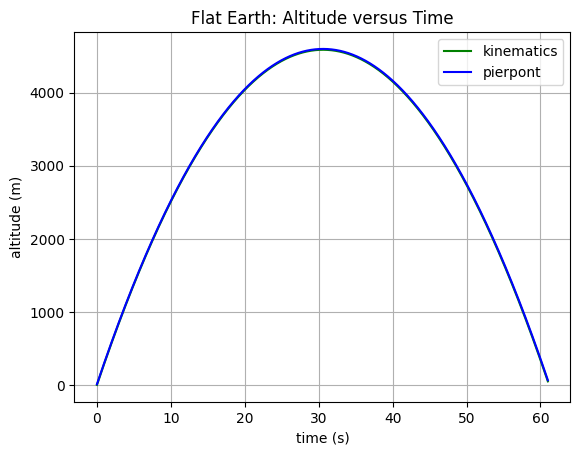

In [3]:
import matplotlib.pyplot as plt

simTime = flatEarthSim.Eom.Metric["time"]
flatAlt = flatEarthSim.Eom.Metric["altitudeMsl_m"]

y = []
for t in simTime:
    y.append(300*t - 0.5*9.81*t*t)

fig, ck = plt.subplots()
ck.plot( simTime, y, 'g', simTime, flatAlt, 'b')
ck.legend(["kinematics","pierpont"])

ck.set(xlabel='time (s)', ylabel='altitude (m)',
       title='Flat Earth: Altitude versus Time')
ck.grid()

# Stevens and Lewis Orbit

In [4]:
%%time
#from pierpont import ppont
#
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "timeStep": [1.0, "s"],
    "altitudeMsl": [100000.0, "m"],
    "trueAirspeed": [9000.0, "m_s"]
}
#
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(20000)

-- OBLATE : EARTH --
++ timeStep = 1.0 [IC case]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 9000.0 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 100000.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Z = 4.88094466281336 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 883 ms, sys: 6.97 ms, total: 890 ms
Wall time: 504 ms


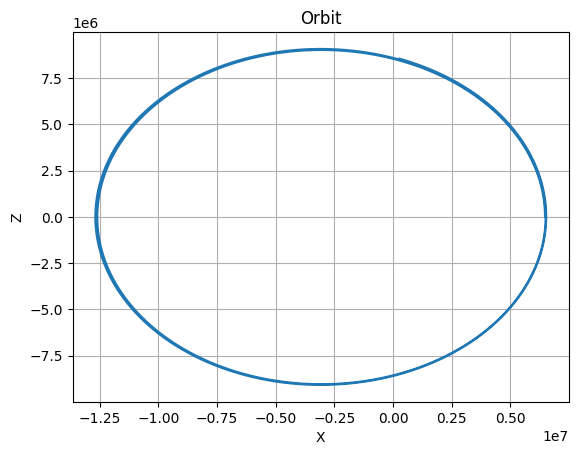

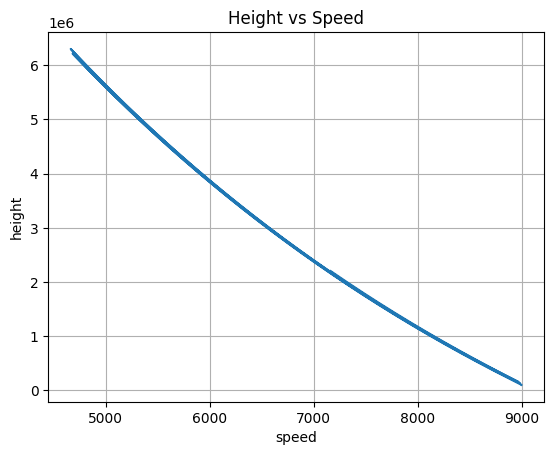

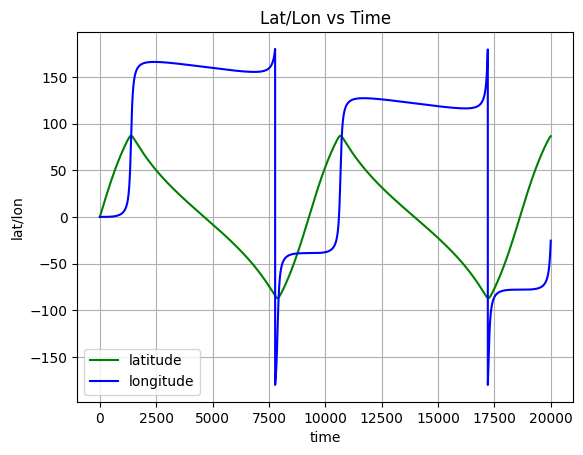

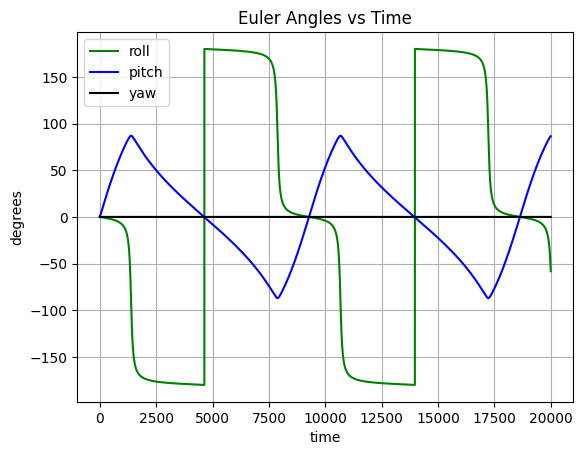

In [5]:
import matplotlib.pyplot as plt
#
gvImperialData = \
{
    'altitudeMsl_ft': ['ft', 'm'], 
    'longitude_deg': ['deg', 'rad'],
    'latitude_deg': ['deg', 'rad'],
    'localGravity_ft_s2': ['ft_s2', 'm_s2'],
    'gePosition_ft_X': ['ft', 'm'], 
    'gePosition_ft_Y': ['ft', 'm'], 
    'gePosition_ft_Z': ['ft', 'm'],
    'eulerAngle_deg_Yaw': ['deg', 'rad'],
    'eulerAngle_deg_Pitch': ['deg', 'rad'],
    'eulerAngle_deg_Roll': ['deg', 'rad'],
    'speedOfSound_ft_s': ['ft_s', 'm_s']
}
#
sim.create_imperial_data(gvImperialData)
#
fig1, a = plt.subplots()
a.plot(sim.Eom.Metric['eiPosition_m_X'], 
       sim.Eom.Metric['eiPosition_m_Z'])
a.set(xlabel='X', ylabel='Z', title='Orbit')
a.grid()

fig2, b = plt.subplots()
b.plot(sim.Eom.Metric['trueAirspeed_m_s'], 
       sim.Eom.Metric['altitudeMsl_m'])
b.set(xlabel='speed', ylabel='height', title='Height vs Speed')
b.grid()

t = sim.Eom.Metric['time']
fig3, c = plt.subplots()
c.plot(t, sim.Imperial['latitude_deg'],'g',
       t, sim.Imperial['longitude_deg'], 'b')
c.legend(["latitude","longitude"])
c.set(xlabel='time', ylabel='lat/lon', title='Lat/Lon vs Time')
c.grid()

fig4, d = plt.subplots()
d.plot(t, sim.Imperial['eulerAngle_deg_Roll'],'g',
       t, sim.Imperial['eulerAngle_deg_Pitch'], 'b',
       t, sim.Imperial['eulerAngle_deg_Yaw'], 'k')
d.legend(["roll","pitch","yaw"])
d.set(xlabel='time', ylabel='degrees', title='Euler Angles vs Time')
d.grid()

# 1: Dragless Sphere

In [6]:
%%time
ic = {
    "totalMass": [ 1, "slug"],
    "bodyMomentOfInertia_X": [3.6,"slugft2"],
    "bodyMomentOfInertia_Y": [3.6,"slugft2"],
    "bodyMomentOfInertia_Z": [3.6,"slugft2"],
    "altitudeMsl": [30000, "ft"]
}
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Y = 4.88094466281336 [IC case]
++ bodyMomentOfInertia_Z = 4.88094466281336 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 34.1 ms, sys: 383 µs, total: 34.4 ms
Wall time: 11.8 ms


In [7]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_01_DroppedSphere/"
    "Atmos_01_sim_01.csv"
)
gvCC1 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dragless Sphere: Oblate Earth", gvImperialData, 
                       sim, gvCC1)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Sphere: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    0.0205 
longitude_deg             0.0     0.0     0.0    
latitude_deg              0.0     

# 2: Dragless tumbling brick

In [8]:
%%time
#from pierpont import ppont
#
ic = {
    "totalMass": [ 0.155404754, "slug"],
    "bodyMomentOfInertia_X": [0.00189422,"slugft2"],
    "bodyMomentOfInertia_Y": [0.006211019,"slugft2"],
    "bodyMomentOfInertia_Z": [0.007194665,"slugft2"],
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
sim = ppont.Simulation("oblate:earth")
sim.reset(ic)
sim.run(30.0)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [IC case]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0 [default]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0 [default]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0.17453292519943295 [IC case]
++ eulerAngleRate_Pitch = 0.3490658503988659 [IC case]
++ eulerAngleRate_Yaw = 0.5235987755982988 [IC case]
++ bodyMomentOfInertia_X = 0.002568217499776201 [IC case]
++ bodyMomentOfInertia_Y = 0.008421011121856215 [IC case]
++ bodyMomentOfInertia_Z = 0.009754656036800024 [IC case]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 7.97 ms, sys: 44 µs, total: 8.01 ms
Wall time

In [9]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_02_TumblingBrickNoDamping/"
    "Atmos_02_sim_01.csv"
)
gvCC2 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dragless Tumbling Brick: Oblate Earth", gvImperialData, 
                       sim, gvCC2)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dragless Tumbling Brick: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.133   0.02    0.0205 
longitude_deg             0.0     0.0     0.0    
latitude_deg              

# 3: Tumbling brick with damping

In [10]:
%%time
#from pierpont import ppont
#
class brickSim(ppont.Simulation):
    def set_aero_inputs(self):
        trueAirspeed = self.Planet.trueAirspeed_m_s
        self.Data["trueAirspeed"] = self.units([trueAirspeed, "m"], "ft")
        self.Data["bodyAngularRate_Roll"] = self.Eom.X[10]
        self.Data["bodyAngularRate_Pitch"] = self.Eom.X[11]
        self.Data["bodyAngularRate_Yaw"] = self.Eom.X[12]
        return
#
ic = {
    "altitudeMsl": [30000, "ft"],
    "eulerAngleRate_Roll": [10, "deg_s"],
    "eulerAngleRate_Pitch": [20, "deg_s"],
    "eulerAngleRate_Yaw": [30, "deg_s"]
}
#
sim = brickSim("oblate:earth")
sim.set_aero_model('models/brick_damping.dml')
sim.reset(ic)
sim.run(30.0)

*******************************************
Model:  Brick Model with Damping
creation date:  2022-12-25
file version:  Initial
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( VRW )
++> Input:  bodyAngularRate_Roll ( PB )
++> Input:  bodyAngularRate_Pitch ( QB )
++> Input:  bodyAngularRate_Yaw ( RB )
++> Output:  Cl
++> Output:  Cm
++> Output:  Cn
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 2.2679618958243624 [DML model]
++ referenceWingSpan = 0.101598984 [DML model]
++ referenceWingChord = 0.203201016 [DML model]
++ referenceWingArea = 0.020644913548800003 [DML model]
++ trueAirspeed = 0.0 [DML model]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle

In [11]:
from pierpont import util
#
sim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_03_TumblingBrickDamping/"
    "Atmos_03_sim_01.csv"
)
gvCC3 = util.get_NESC_data(checkFile)
#
util.print_error_table("Tumbling Brick Damping: Oblate Earth", 
                       gvImperialData, sim, gvCC3)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Tumbling Brick Damping: Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            0.141   0.022   0.0218 
longitude_deg             0.0     0.0     0.0    
latitude_deg              0

In [12]:
import matplotlib.pyplot as plt

def MakePlot(simData, checkData, simCaseLabel):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.plot(checkData['time'], checkData[simCaseLabel],'g', 
             simData.Imperial['time'], simData.Imperial[simCaseLabel], 'b')
    ax1.set(xlabel='time (s)', ylabel=simCaseLabel, title=simCaseLabel)
    ax1.legend(["NESC","pierpont"])

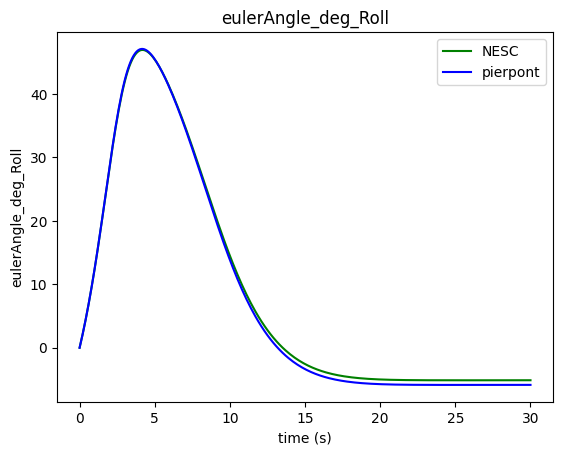

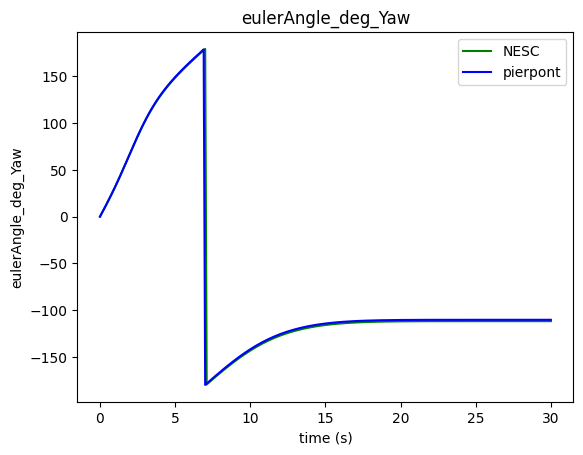

In [13]:
MakePlot(sim, gvCC3, 'eulerAngle_deg_Roll')
MakePlot(sim, gvCC3, 'eulerAngle_deg_Yaw')

# 6: Sphere dropping over rotating, ellipsoidal Earth

In [14]:
%%time
#from pierpont import ppont
#
class ballSim(ppont.Simulation):
    def set_aero_inputs(self):
        [u, v, w] = self.Eom.body_velocity()
        self.Data["angleOfAttack"] = math.atan2(w, u)
        return
#
ic = {
    "altitudeMsl": [30000, "ft"]
}
#
bsim = ballSim("oblate:earth")
bsim.set_aero_model('models/sphere_aero.dml')
bsim.reset(ic)
bsim.run(30)

*******************************************
Model:  Example cannonball aerodynamic model
creation date:  2022-12-31
file version:  Inital Version
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  angleOfAttack ( alpha )
++> Output:  CX
++> Output:  CY
++> Output:  CZ
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----
-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ trueAirspeed = 0 [default]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 9144.0 [IC case]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = 0.0 [DML model]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ euler

In [15]:
from pierpont import util
#
gvImperialData = \
{
    'altitudeMsl_ft': ['ft', 'm'], 
    'longitude_deg': ['deg', 'rad'],
    'latitude_deg': ['deg', 'rad'],
    'localGravity_ft_s2': ['ft_s2', 'm_s2'],
    'gePosition_ft_X': ['ft', 'm'], 
    'gePosition_ft_Y': ['ft', 'm'], 
    'gePosition_ft_Z': ['ft', 'm'],
    'eulerAngle_deg_Yaw': ['deg', 'rad'],
    'eulerAngle_deg_Pitch': ['deg', 'rad'],
    'eulerAngle_deg_Roll': ['deg', 'rad'],
    'speedOfSound_ft_s': ['ft_s', 'm_s'],
    'trueAirspeed_nmi_h': ['nmi_h', 'm_s'],
    'aero_bodyForce_lbf_X': ['lbf', 'N'],
    'aero_bodyForce_lbf_Y': ['lbf', 'N'],
    'aero_bodyForce_lbf_Z': ['lbf', 'N']
}
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_06_DroppedSphereEllipsoidalNoWind/"
    "Atmos_06_sim_01.csv"
)
gvCC6 = util.get_NESC_data(checkFile)
#
util.print_error_table("Dropped Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC6)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
Dropped Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            36.133  5.845   5.8453 
longitude_deg             0.0     0.0     0.0    
latitude_deg              

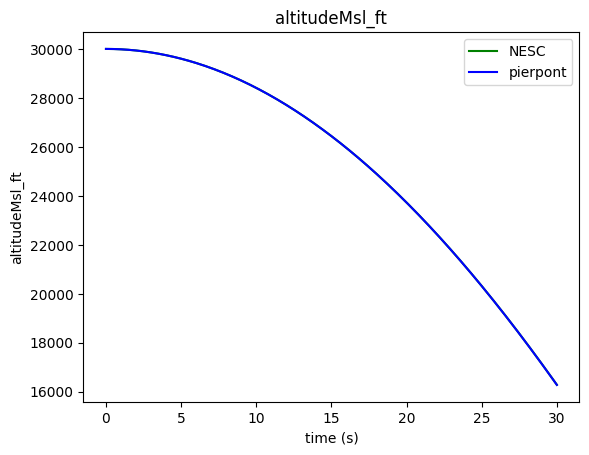

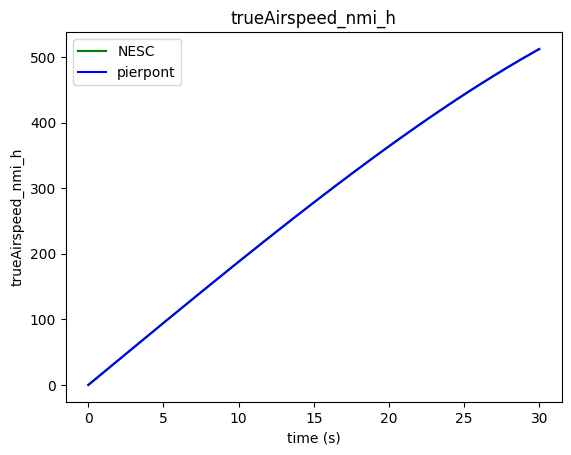

In [16]:
MakePlot(bsim, gvCC6, 'altitudeMsl_ft')
MakePlot(bsim, gvCC6, 'trueAirspeed_nmi_h')

# 9: Eastward firing ballistic sphere

In [17]:
%%time
#from pierpont import ppont
#
# velocity: 0, 1000, -1000
#  1414.21356237
#
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"],
    "eulerAngle_Yaw": [90, "deg"]
}
#
bsim.reset(ic)
bsim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 0 [default]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 1.5707963267948966 [IC case]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [DML model]
++ bodyMomentOfInertia_Y = 4.88094466281336 [DML model]
++ bodyMomentOfInertia_Z = 4.88094466281336 [DML model]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 24 ms, sys: 106 µs, total: 24.1 ms
Wall

In [18]:
from pierpont import util
#
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_09_EastwardCannonball/"
    "Atmos_09_sim_01.csv"
)
gvCC9 = util.get_NESC_data(checkFile)
#
util.print_error_table("East fired Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC9)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
East fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            609.793 51.651  51.6513
longitude_deg             0.001   0.0     0.0001 
latitude_deg           

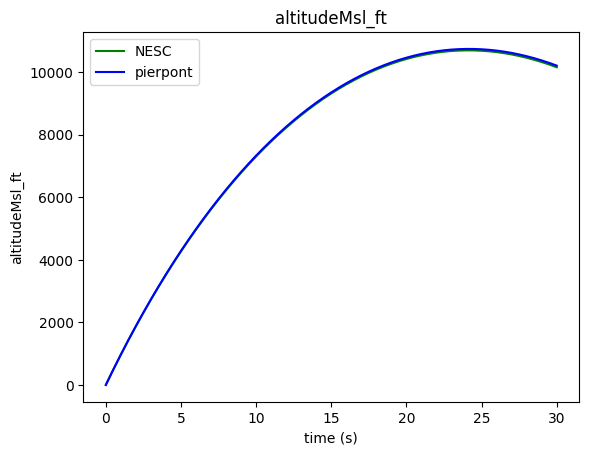

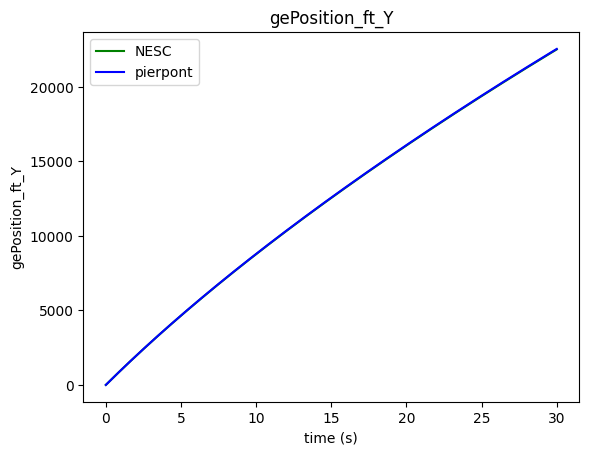

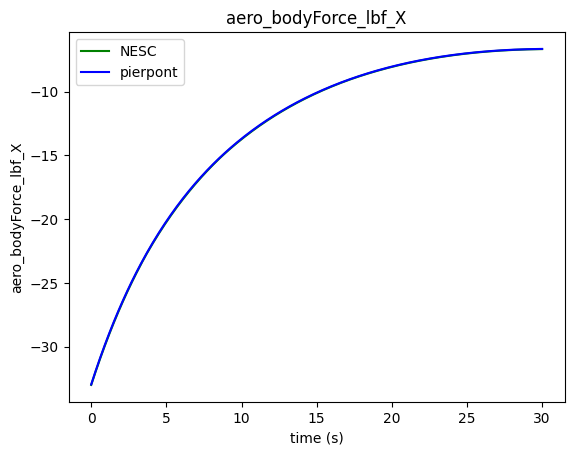

In [19]:
MakePlot(bsim, gvCC9, 'altitudeMsl_ft')
MakePlot(bsim, gvCC9, 'gePosition_ft_Y')
MakePlot(bsim, gvCC9, 'aero_bodyForce_lbf_X')

# 10: Northward firing ballistic sphere

In [20]:
%%time
#from pierpont import ppont
#
# velocity: 1000, 0, -1000
#  1414.21356237
#
ic = {
    "trueAirspeed": [1414.21356237, "ft_s"],
    "angleOfAttack": [-45, "deg"]
}
#
bsim.reset(ic)
bsim.run(30)

-- OBLATE : EARTH --
++ timeStep = 0.1 [default]
++ totalMass = 14.593902937 [DML model]
++ referenceWingSpan = 0 [default]
++ referenceWingChord = 0 [default]
++ referenceWingArea = 0.018241465452480003 [DML model]
++ trueAirspeed = 431.05229381037606 [IC case]
++ latitude = 0 [default]
++ longitude = 0 [default]
++ altitudeMsl = 0 [default]
++ fePosition_m_X = 0 [default]
++ fdPosition_m_Y = 0 [default]
++ eulerAngle_Roll = 0 [default]
++ eulerAngle_Pitch = 0 [default]
++ eulerAngle_Yaw = 0 [default]
++ angleOfAttack = -0.7853981633974483 [IC case]
++ angleOfSideslip = 0 [default]
++ eulerAngleRate_Roll = 0 [default]
++ eulerAngleRate_Pitch = 0 [default]
++ eulerAngleRate_Yaw = 0 [default]
++ bodyMomentOfInertia_X = 4.88094466281336 [DML model]
++ bodyMomentOfInertia_Y = 4.88094466281336 [DML model]
++ bodyMomentOfInertia_Z = 4.88094466281336 [DML model]
++ bodyProductOfInertia_XZ = 0 [default]
======done=======
CPU times: user 30.2 ms, sys: 431 µs, total: 30.6 ms
Wall time: 9.87 ms


In [21]:
from pierpont import util
#
bsim.create_imperial_data(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_10_NorthwardCannonball/"
    "Atmos_10_sim_01.csv"
)
gvCC10 = util.get_NESC_data(checkFile)
#
util.print_error_table("North fired Sphere (Cd=0.1): Oblate Earth", gvImperialData, 
                       bsim, gvCC10)

number of headers:  31
['time', 'gePosition_ft_X', 'gePosition_ft_Y', 'gePosition_ft_Z', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'dynamicPressure_lbf_ft2', 'trueAirspeed_nmi_h']
North fired Sphere (Cd=0.1): Oblate Earth
Variable                  L2      L-Inf   Frechet
--------                  --      -----   --------
altitudeMsl_ft            416.753 33.303  33.3029
longitude_deg             0.001   0.0     0.0001 
latitude_deg          

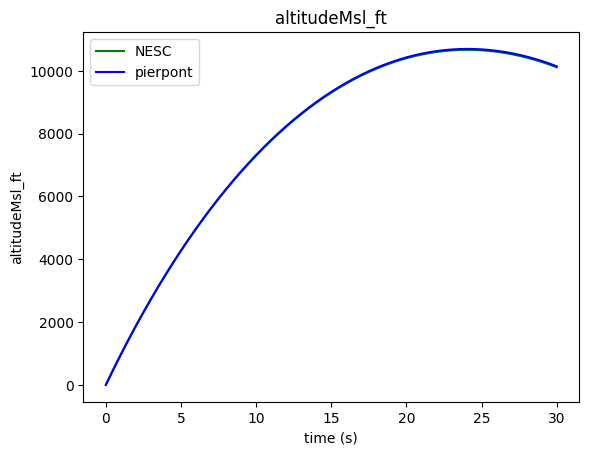

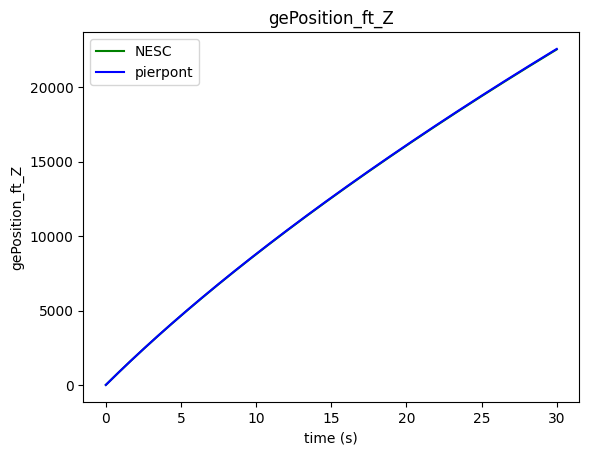

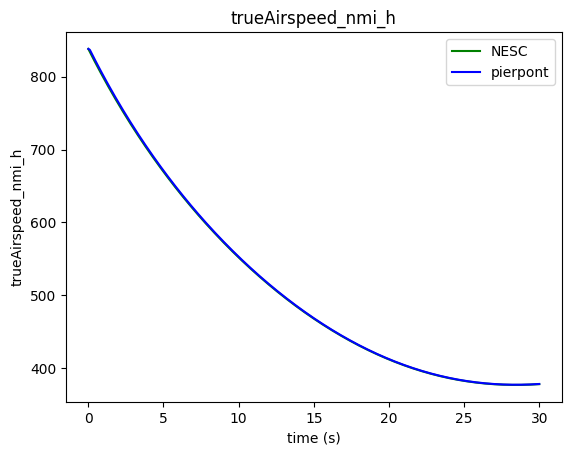

In [22]:
MakePlot(bsim, gvCC10, 'altitudeMsl_ft')
MakePlot(bsim, gvCC10, 'gePosition_ft_Z')
MakePlot(bsim, gvCC10, 'trueAirspeed_nmi_h')

# 11: Steady subsonic flight of F-16

## F-16 model check

In [23]:
from pierpont import daveML

gvDaveModel = daveML.Model()
gvDaveModel.LoadDml('models/F16/F16_aero.dml', False)
gvDaveModel.CheckModel()

*******************************************
Model:  F-16 Subsonic Aerodynamics Model (a la Garza)
creation date:  2003-06-10
file version:  $ Revision: 395 $
*******************************************

+++++ MODEL INPUTS AND OUTPUTS +++++
++> Input:  trueAirspeed ( vt )
++> Input:  angleOfAttack ( alpha )
++> Input:  angleOfSideslip ( beta )
++> Input:  rollBodyRate ( p )
++> Input:  pitchBodyRate ( q )
++> Input:  yawBodyRate ( r )
++> Input:  elevatorDeflection ( el )
++> Input:  aileronDeflection ( ail )
++> Input:  rudderDeflection ( rdr )
++> Input:  XBodyPositionOfCG ( xcg )
++> Output:  cx
++> Output:  cy
++> Output:  cz
++> Output:  cl
++> Output:  cm
++> Output:  cn
++++++++++++++++++++++++++++++++++++

----- DAVE-ML MODEL PARSE COMPLETE -----

----- CheckModel -----

numSignals:  [67, 67, 67, 16, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67]

----- END CheckModel -----



## F-16 simulation

In [24]:
%%time
#from pierpont import ppont
#
# 36.01916667, -75.67444444, 10013
ic = {
    "trueAirspeed": [335.15, "kt"],
    "angleOfAttack": [0, "deg"],
    "eulerAngle_Yaw": [45, "deg"],
    "latitude": [36.01916667, "deg"],
    "longitude": [-75.67444444, "deg"],
    "altitudeMsl": [10013, "ft"]
}
#
#gvOblateRotatingEarth = ppont.slEarthSim('models/F16/F16_aero.dml')
#gvOblateRotatingEarth.Reset(ic)
#gvOblateRotatingEarth.Run(180)

CPU times: user 875 µs, sys: 4 µs, total: 879 µs
Wall time: 16.9 µs


In [25]:
from pierpont import util
#
#gvOblateRotatingEarth.RecData.CreateImperialData(gvImperialData)
#
checkFile = (
    "NESC-check-cases/Atmospheric_checkcases/Atmos_11_TrimCheckSubsonicF16/"
    "Atmos_11_sim_02.csv"
)
gvCC11 = util.get_NESC_data(checkFile)
#

number of headers:  27
['time', 'feVelocity_ft_s_X', 'feVelocity_ft_s_Y', 'feVelocity_ft_s_Z', 'altitudeMsl_ft', 'longitude_deg', 'latitude_deg', 'localGravity_ft_s2', 'eulerAngle_deg_Yaw', 'eulerAngle_deg_Pitch', 'eulerAngle_deg_Roll', 'bodyAngularRateWrtEi_deg_s_Roll', 'bodyAngularRateWrtEi_deg_s_Pitch', 'bodyAngularRateWrtEi_deg_s_Yaw', 'altitudeRateWrtMsl_ft_min', 'speedOfSound_ft_s', 'airDensity_slug_ft3', 'ambientPressure_lbf_ft2', 'ambientTemperature_dgR', 'aero_bodyForce_lbf_X', 'aero_bodyForce_lbf_Y', 'aero_bodyForce_lbf_Z', 'aero_bodyMoment_ftlbf_L', 'aero_bodyMoment_ftlbf_M', 'aero_bodyMoment_ftlbf_N', 'mach', 'trueAirspeed_nmi_h']
